In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
from pathlib import Path
import sys
parent_path = str(Path().joinpath('..\..\..\..').resolve())
sys.path.append(parent_path)

In [3]:
from triple_agent.parsing.replay.get_parsed_replays import get_parsed_replays
from triple_agent.constants.events import select_sc19
from triple_agent.reports.specific.character_selection import (spy_selection,
                                                      st_selection,
                                                      amba_selection,
                                                      double_agent_selection,
                                                      determine_character_in_role)
from triple_agent.reports.specific.game_outcomes import game_outcomes
from triple_agent.classes.roles import Roles
from triple_agent.classes.outcomes import WinType
from triple_agent.classes.missions import Missions, MissionStatus
from triple_agent.classes.venues import Venue
from triple_agent.reports.generation.common_sort_functions import sort_by_spy_wins, sort_by_sniper_wins
from triple_agent.reports.generation.plot_specs import AxisProperties, DataQueryProperties, PlotLabelStyle
from triple_agent.reports.specific.action_tests import action_test_percentages, diff_action_test_percentages
from triple_agent.reports.specific.mission_choices import mission_choices
from triple_agent.reports.specific.mission_completes import (mission_completion_query,
    mission_completion,
    _mission_completes_details)
from triple_agent.reports.generation.generic_query import query
from triple_agent.reports.generation.plot_specs import DataQueryProperties, AxisProperties
from triple_agent.classes.action_tests import ActionTest
from collections import Counter, defaultdict
from matplotlib import pyplot as plt
from itertools import zip_longest
from datetime import datetime, timedelta

In [4]:
event = 'SCL6'

In [5]:
replays = get_parsed_replays(lambda g: g.event == event)

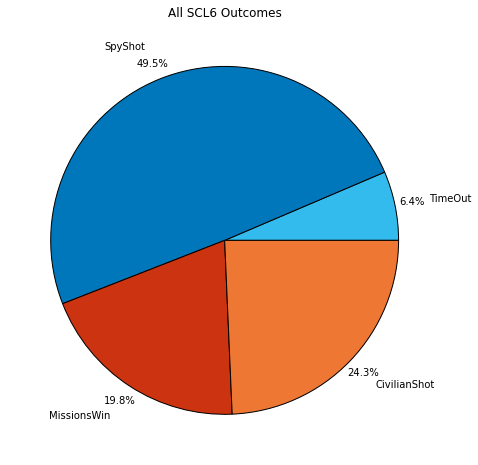

,WinType.TimeOut,WinType.SpyShot,WinType.MissionsWin,WinType.CivilianShot
NaN,165,1273,508,625


In [6]:
game_outcomes(
    replays,
    axis_properties=AxisProperties(title=f"All {event} Outcomes")
).frame

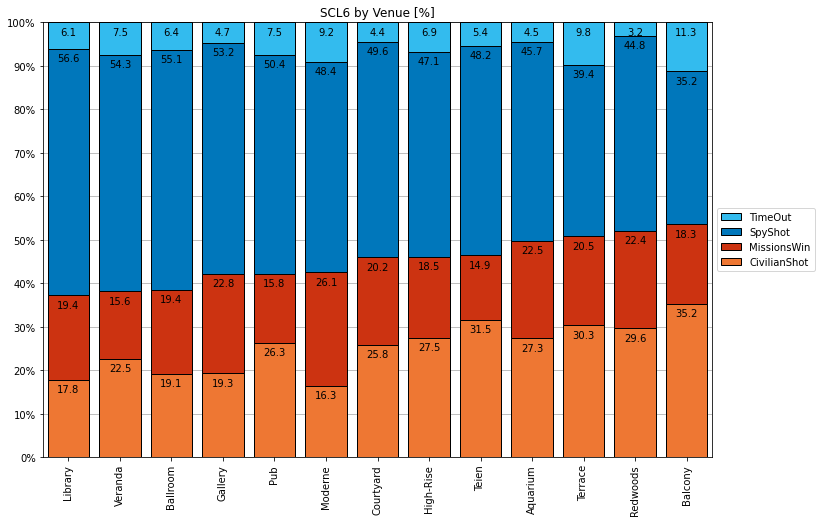

,Venue.Library,Venue.Veranda,Venue.Ballroom,Venue.Gallery,Venue.Pub,Venue.Moderne,Venue.Courtyard,Venue.HighRise,Venue.Teien,Venue.Aquarium,Venue.Terrace,Venue.Redwoods,Venue.Balcony
WinType.TimeOut,0.061489,0.075145,0.063712,0.046784,0.075188,0.091503,0.044355,0.068783,0.053571,0.044944,0.098485,0.032,0.112676
WinType.SpyShot,0.566343,0.543353,0.551247,0.532164,0.503759,0.483660,0.495968,0.470899,0.482143,0.456929,0.393939,0.448,0.352113
WinType.MissionsWin,0.194175,0.156069,0.193906,0.228070,0.157895,0.261438,0.201613,0.185185,0.148810,0.224719,0.204545,0.224,0.183099
WinType.CivilianShot,0.177994,0.225434,0.191136,0.192982,0.263158,0.163399,0.258065,0.275132,0.315476,0.273408,0.303030,0.296,0.352113


In [7]:
game_outcomes(
    replays,
    DataQueryProperties(
        groupby=lambda g: g.venue,
        secondary_order=sort_by_spy_wins,
        percent_normalized_data=True,
    ),
    axis_properties=AxisProperties(
        title=f"{event} by Venue [%]",
        data_label_style=PlotLabelStyle.Plain,
    )
).frame

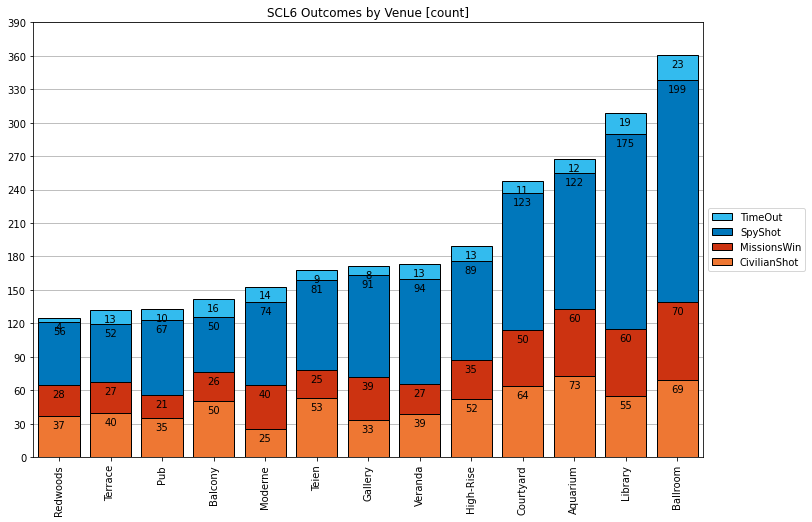

,Venue.Redwoods,Venue.Terrace,Venue.Pub,Venue.Balcony,Venue.Moderne,Venue.Teien,Venue.Gallery,Venue.Veranda,Venue.HighRise,Venue.Courtyard,Venue.Aquarium,Venue.Library,Venue.Ballroom
WinType.TimeOut,4,13,10,16,14,9,8,13,13,11,12,19,23
WinType.SpyShot,56,52,67,50,74,81,91,94,89,123,122,175,199
WinType.MissionsWin,28,27,21,26,40,25,39,27,35,50,60,60,70
WinType.CivilianShot,37,40,35,50,25,53,33,39,52,64,73,55,69


In [8]:
game_outcomes(
    replays,
    DataQueryProperties(
        groupby=lambda g: g.venue,
        secondary_order=sum,
    ),
    axis_properties=AxisProperties(
        title=f"{event} Outcomes by Venue [count]",
        data_label_style=PlotLabelStyle.Plain,
    )
).frame

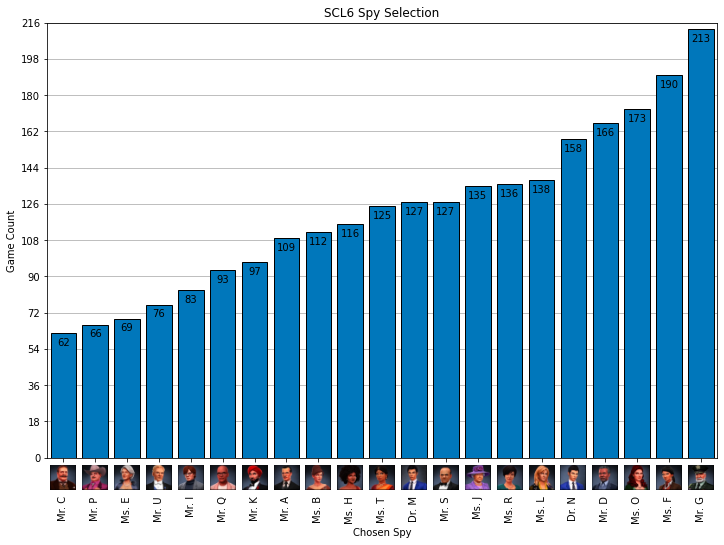

In [9]:
_ = spy_selection(
    replays,
    axis_properties = AxisProperties(
        title=f"{event} Spy Selection",
        x_axis_portrait=True,
        y_axis_label="Game Count",
        x_axis_label="Chosen Spy",
    ),
    data_query = DataQueryProperties(
        primary_order=sum,
    )
)

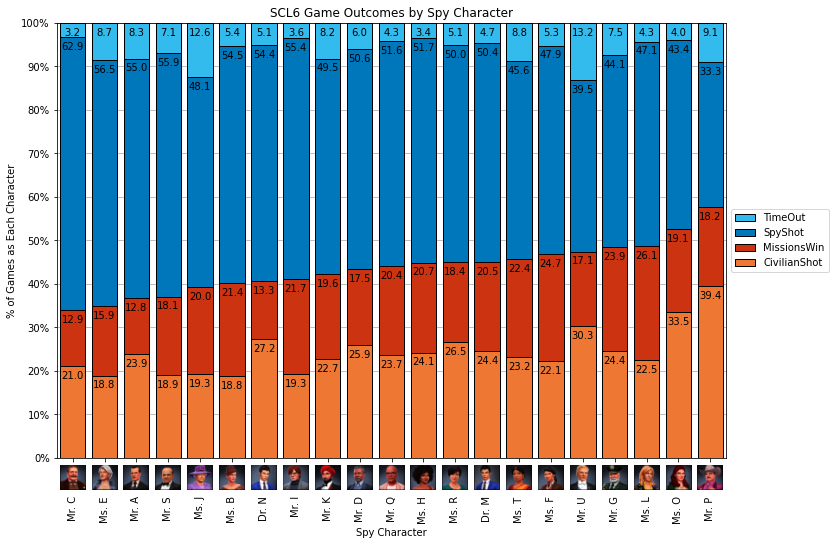

In [10]:
_ = game_outcomes(
    replays,
    axis_properties = AxisProperties(
        title=f"{event} Game Outcomes by Spy Character",
        x_axis_portrait=True,
        y_axis_label="% of Games as Each Character",
        x_axis_label="Spy Character",
        data_label_style=PlotLabelStyle.Plain,
    ),
    data_query = DataQueryProperties(
        groupby=lambda g: determine_character_in_role(g, Roles.Spy),
        secondary_order=sort_by_spy_wins,
        percent_normalized_data=True
    )
)

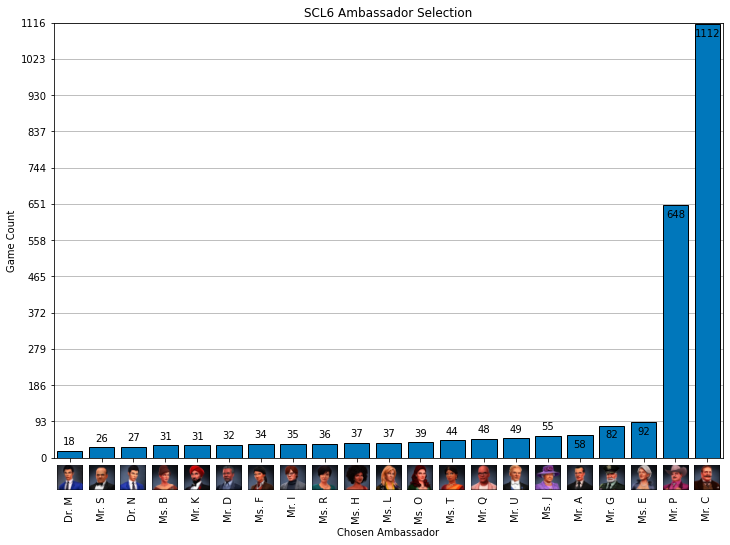

In [11]:
_ = amba_selection(
    replays,
    axis_properties = AxisProperties(
        title=f"{event} Ambassador Selection",
        x_axis_portrait=True,
        y_axis_label="Game Count",
        x_axis_label="Chosen Ambassador",
    ),
    data_query = DataQueryProperties(
        primary_order=sum,
    )
)

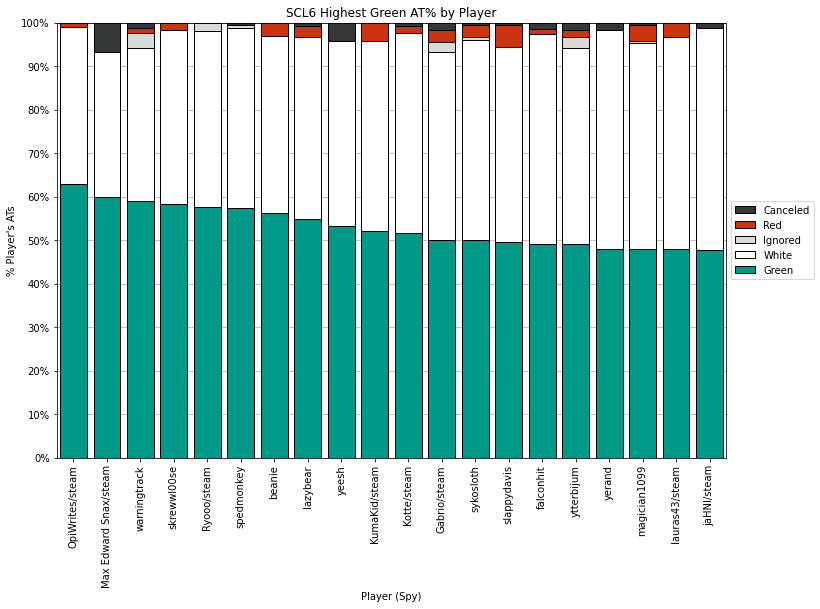

In [12]:
_ = action_test_percentages(
    replays,
    axis_properties = AxisProperties(
        title=f'{event} Highest Green AT% by Player',
        x_axis_label='Player (Spy)',
        y_axis_label='% Player\'s ATs',
    ),
    data_query = DataQueryProperties(
        groupby=lambda g: g.spy,
        secondary_order=lambda name_series: -name_series[1][ActionTest.Green],
        reverse_primary_order=True,
        percent_normalized_data=True,
        limit=20
    )    
)

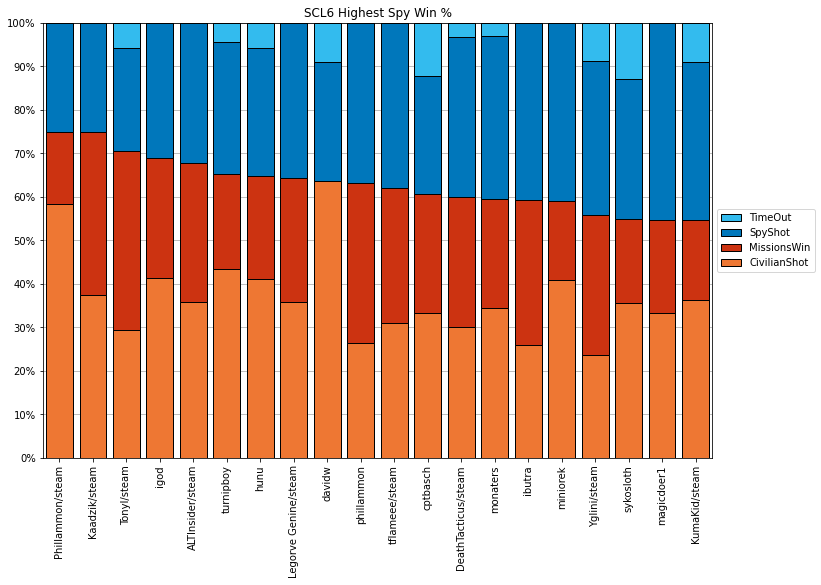

In [13]:
spy_winr = game_outcomes(
    replays,
    DataQueryProperties(
        groupby=lambda g: g.spy,
        secondary_order=sort_by_spy_wins,
        reverse_secondary_order=True,
        percent_normalized_data=True,
        limit=20
    ),
    axis_properties=AxisProperties(title=f"{event} Highest Spy Win %")
)

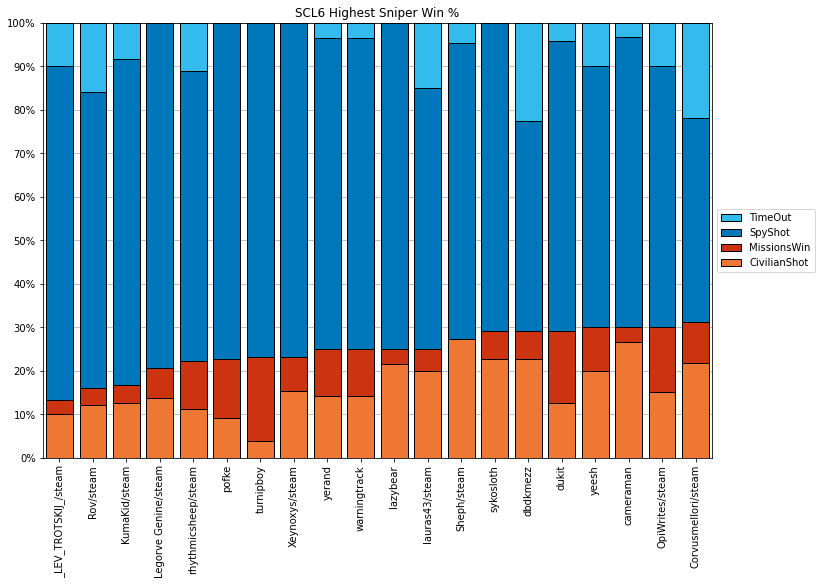

In [14]:
_ = game_outcomes(
    replays,
    DataQueryProperties(
        groupby=lambda g: g.sniper,
        secondary_order=sort_by_sniper_wins,
        reverse_secondary_order=True,
        percent_normalized_data=True,
        limit=20
    ),
    axis_properties=AxisProperties(title=f"{event} Highest Sniper Win %")
)

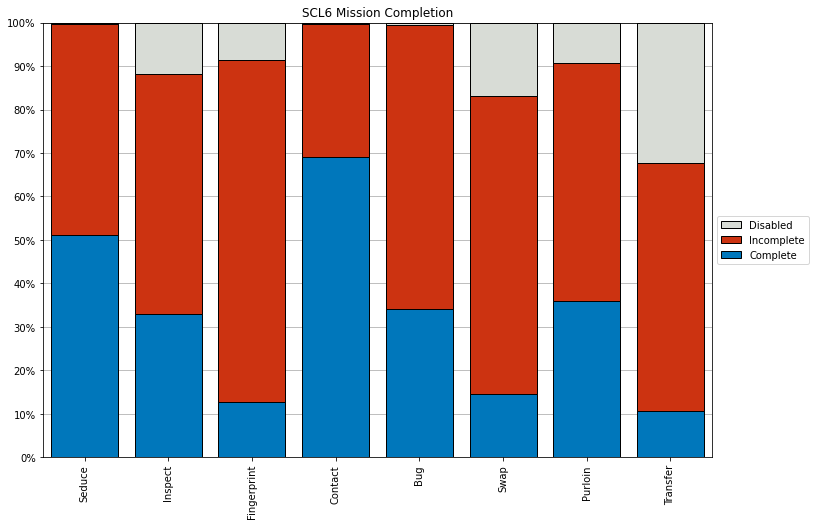

In [15]:
mission_completion(replays, f"{event} Mission Completion")

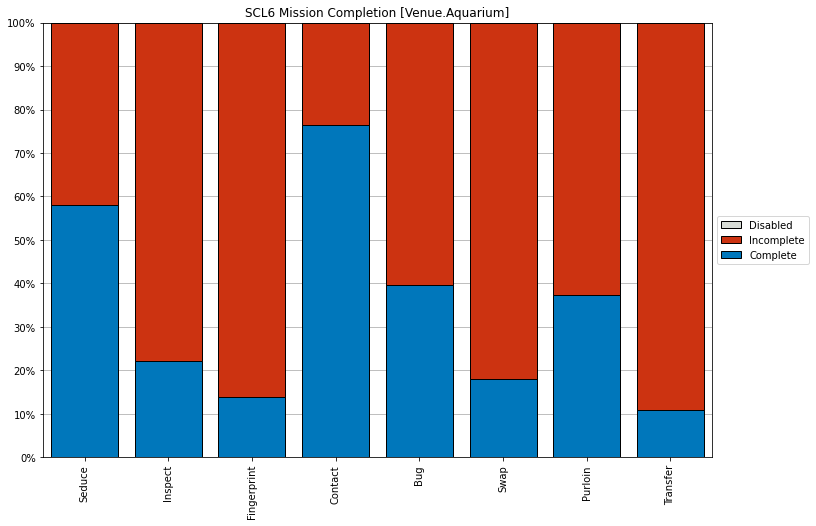

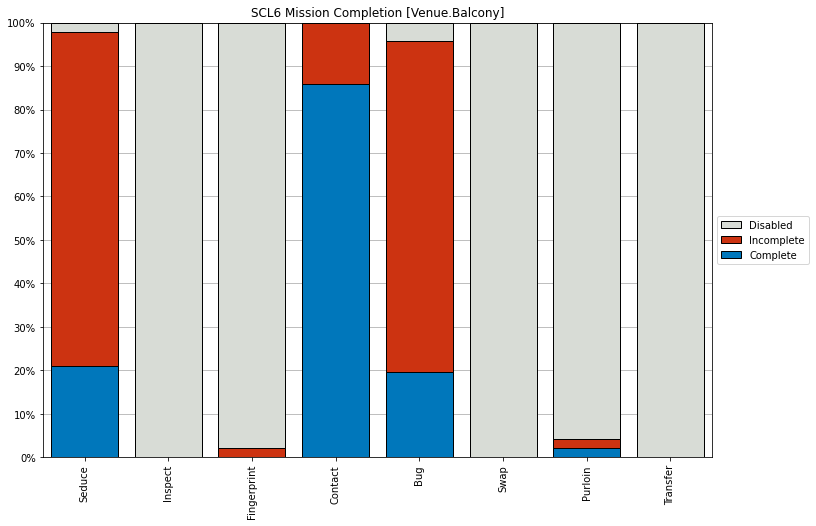

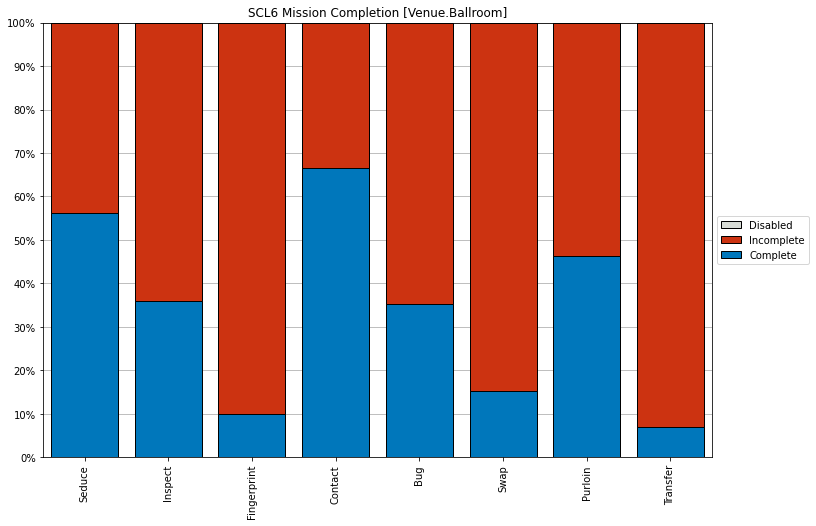

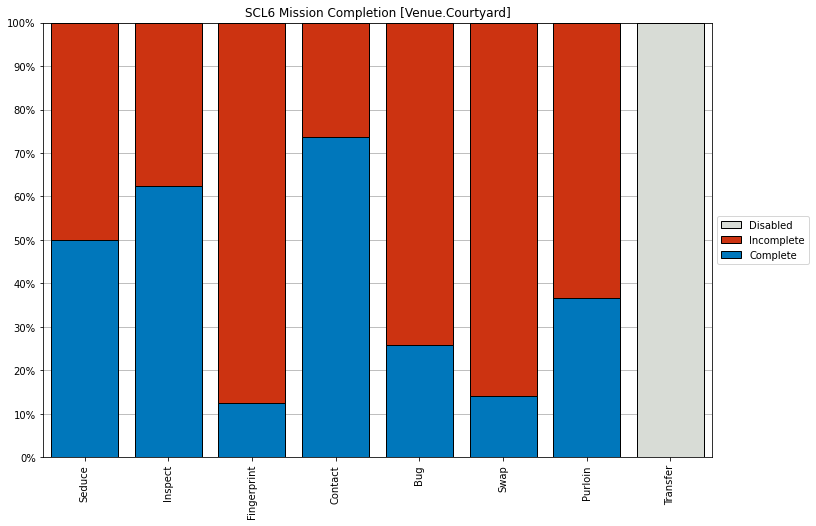

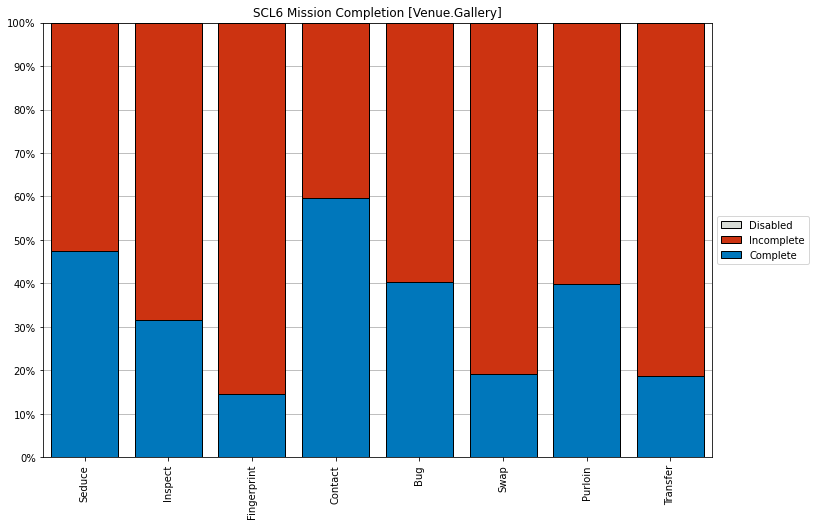

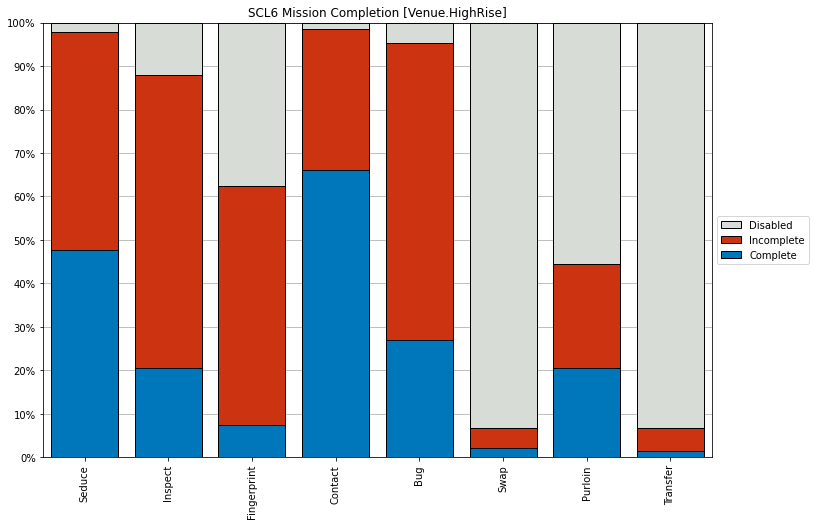

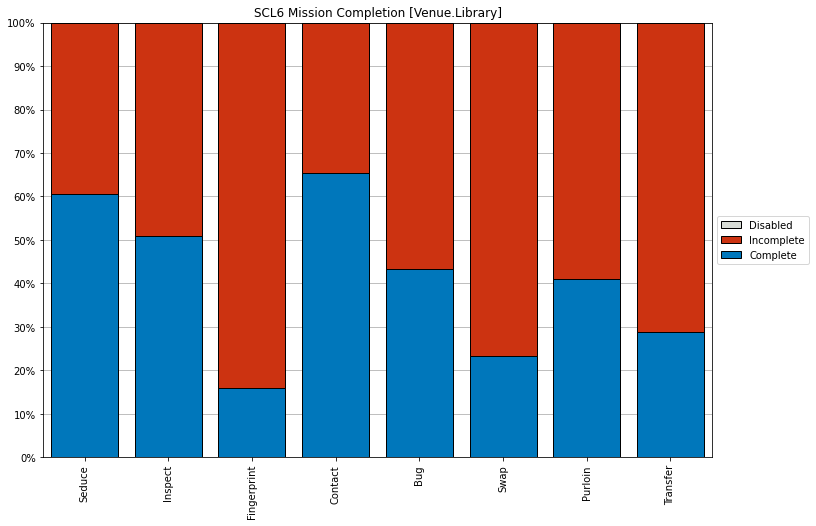

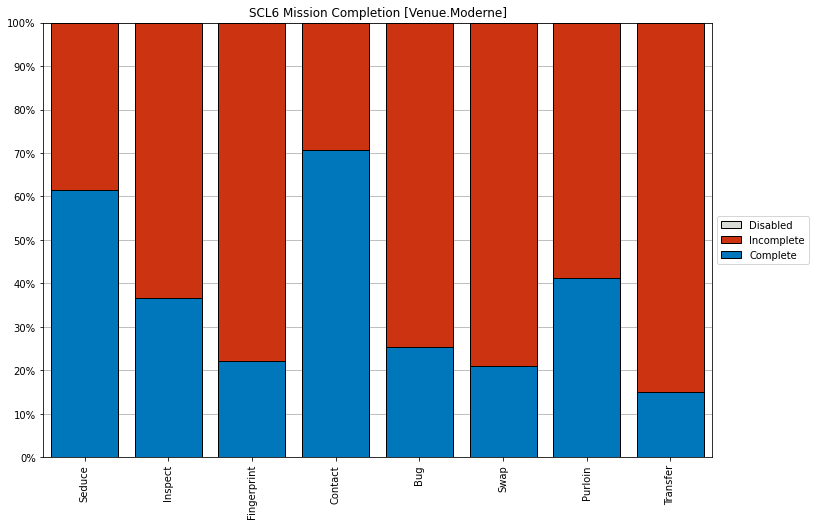

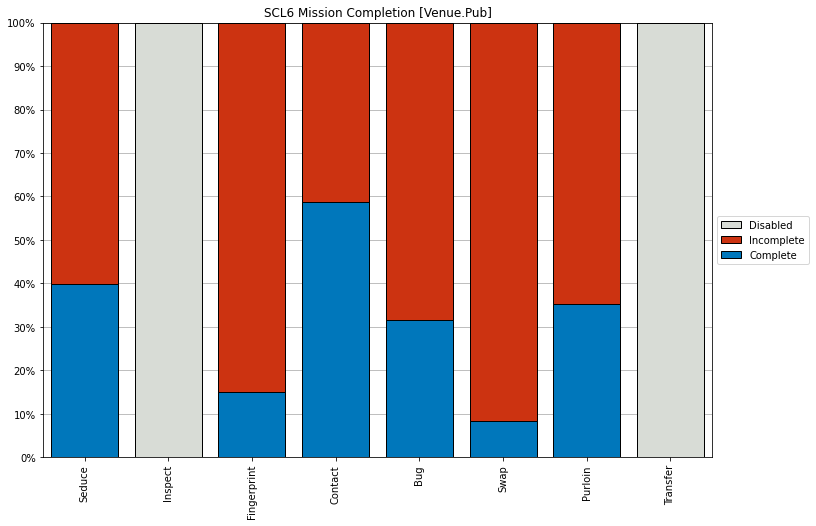

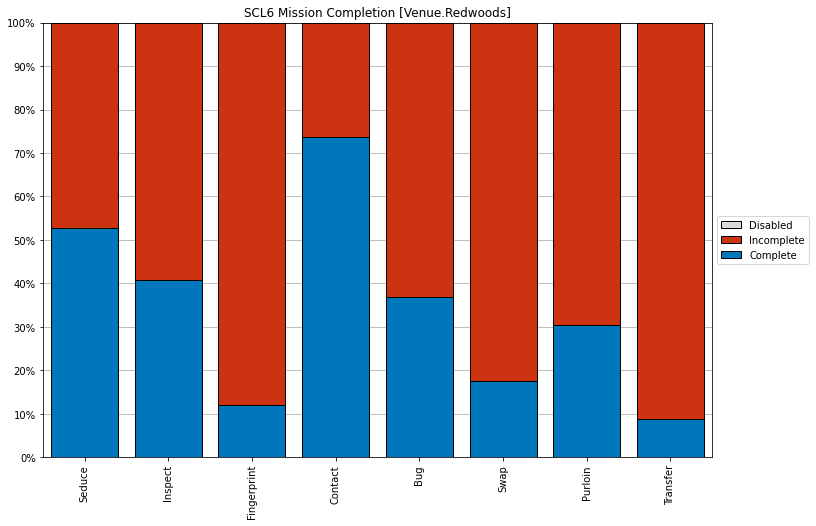

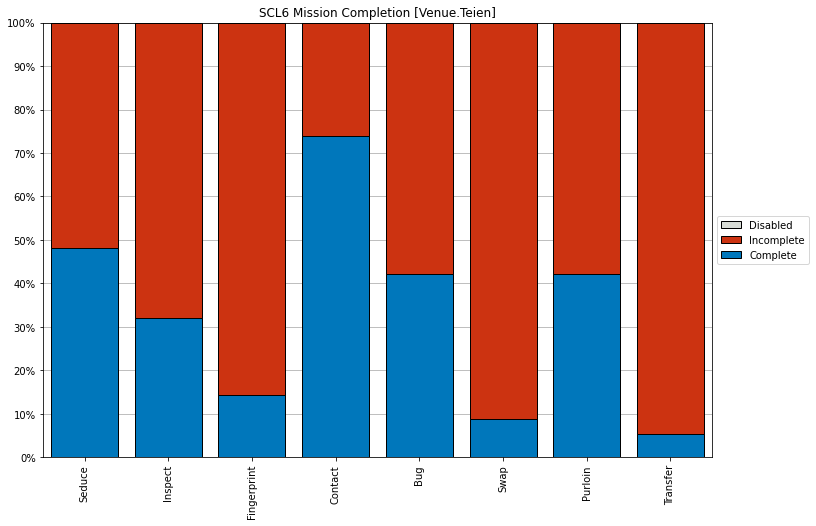

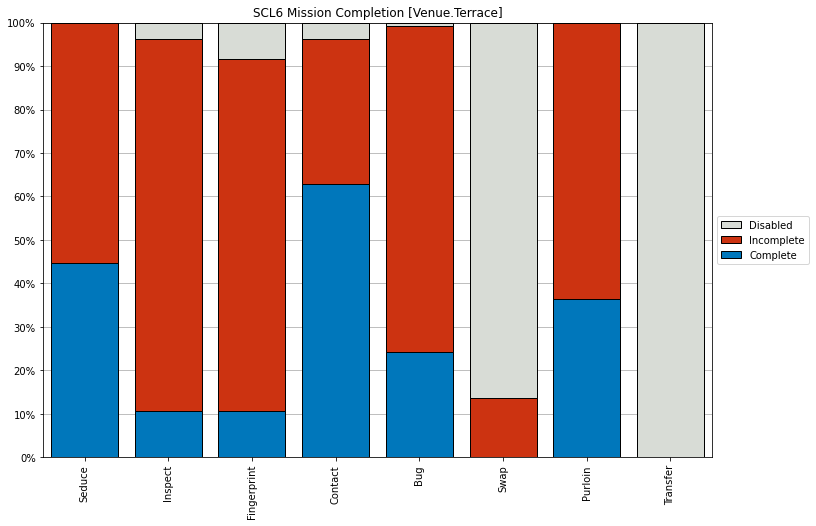

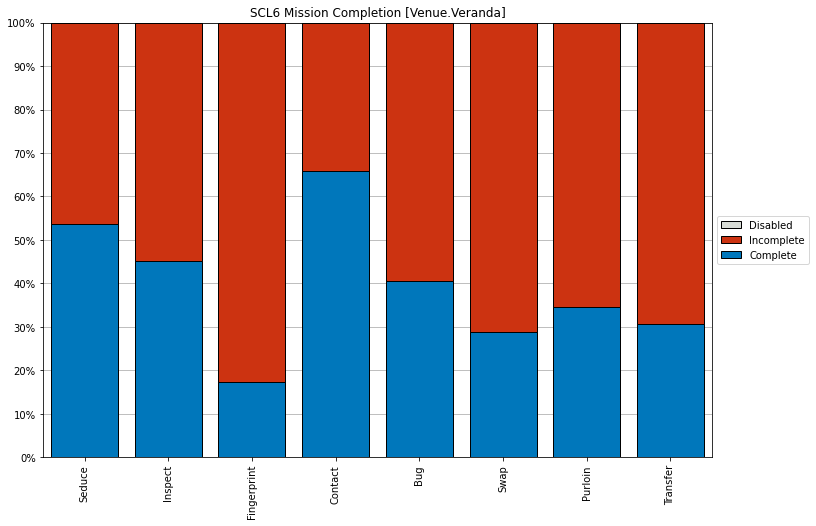

In [16]:
for venue in sorted(set([g.venue for g in replays])):
    mission_completion(list(filter(lambda g: g.venue == venue, replays)), f"{event} Mission Completion [{venue}]")

In [17]:
WEEK_1_START = datetime.fromisoformat("2020-05-03T08:00:00") # midnight pacific is 8AM UTC
NUM_WEEKS = 21 # overshoot regular season a bit, just to make sure

In [18]:
WEEK_STARTS = [WEEK_1_START + timedelta(days=7 * n) for n in range(NUM_WEEKS)]

In [19]:
WEEK_STARTS

[datetime.datetime(2020, 5, 3, 8, 0),
 datetime.datetime(2020, 5, 10, 8, 0),
 datetime.datetime(2020, 5, 17, 8, 0),
 datetime.datetime(2020, 5, 24, 8, 0),
 datetime.datetime(2020, 5, 31, 8, 0),
 datetime.datetime(2020, 6, 7, 8, 0),
 datetime.datetime(2020, 6, 14, 8, 0),
 datetime.datetime(2020, 6, 21, 8, 0),
 datetime.datetime(2020, 6, 28, 8, 0),
 datetime.datetime(2020, 7, 5, 8, 0),
 datetime.datetime(2020, 7, 12, 8, 0),
 datetime.datetime(2020, 7, 19, 8, 0),
 datetime.datetime(2020, 7, 26, 8, 0),
 datetime.datetime(2020, 8, 2, 8, 0),
 datetime.datetime(2020, 8, 9, 8, 0),
 datetime.datetime(2020, 8, 16, 8, 0),
 datetime.datetime(2020, 8, 23, 8, 0),
 datetime.datetime(2020, 8, 30, 8, 0),
 datetime.datetime(2020, 9, 6, 8, 0),
 datetime.datetime(2020, 9, 13, 8, 0),
 datetime.datetime(2020, 9, 20, 8, 0)]

In [20]:
def was_game_on_time(games, data_dictionary):
    for game in games:
        if game.week is not None:
            start = WEEK_STARTS[game.week-1]
            end = WEEK_STARTS[game.week]

            on_time = start < game.start_time < end
            
            data_dictionary[on_time] += 1

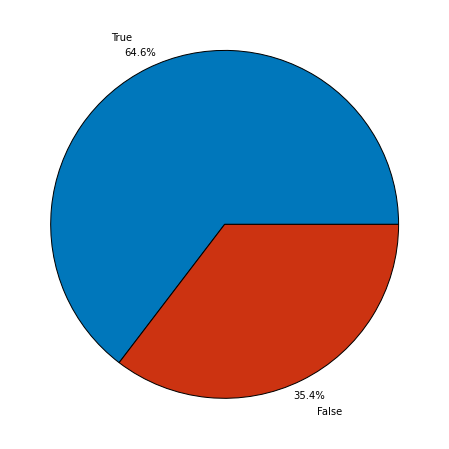

In [21]:
_=query(
    replays,
    data_query=DataQueryProperties(
        query_function=was_game_on_time
    )
)

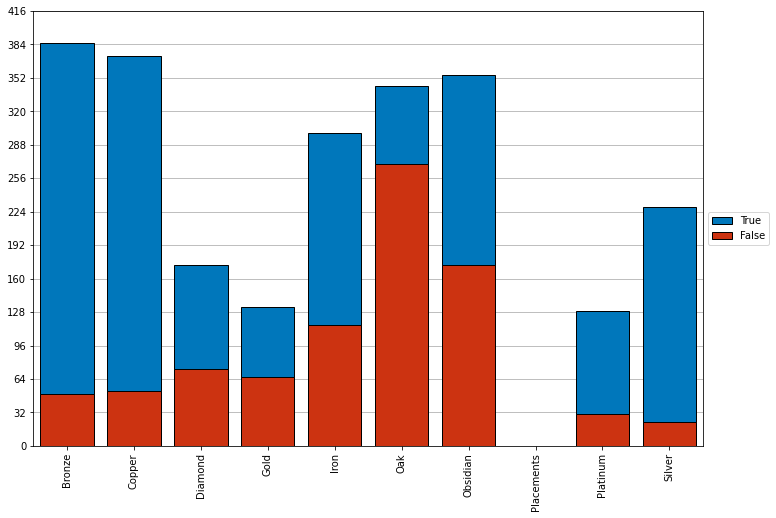

In [22]:
_=query(
    replays,
    data_query=DataQueryProperties(
        query_function=was_game_on_time,
        groupby=lambda g: g.division
    )
)